# Module 7 Assignment

In this module, we've learned a lot about data visualization. Now I want you to use what you've learned to build some visuals with a few datasets.

### How does this work?

Everywhere in the notebook where you see `# YOUR CODE HERE`, you need to insert an answer. 
Make sure to remove the `raise NotImplementedError` code so your code will successfully run. :)

Please run the cell once you have input the answer to see if it runs properly. 

### Debugging Notes

The debugging notes section at the bottom is there for you to add your thoughts on the assignment. Please make sure to put something, even if the assignment was a breeze!

In [311]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Part 1: Pandas, Matplotlib and the Titanic (3 points)

Use the `full_titanic.csv` from the `data` folder. Import into Pandas and build a simple chart. Take time to explore the data and a few charts before deciding on one you like. Include the code of your investigation and reasoning. Make sure to also answer the **"Your chart choice"** section below.

By the way, `survived == 1` are those who survived.

Some ideas for possible charts (you are free to use these, or come up with your own!):

- A chart showing age comparisons or distribution (survival vs. death)
- A chart showing gender comparisons or distribution (survival vs. death)
- A chart using Passenger Class and x (x being any other point of data &mdash; including survival vs. death)

HINT: Take a look at the Pandas user guide [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) section to see built-in "plot" types. 


In [312]:
# YOUR CODE HERE
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [313]:
df.shape

(887, 8)

In [314]:
# how many people in each class?
df.Pclass.value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [315]:
# how many people of each gender?
df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [316]:
# how many people survived or did not?
df.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [317]:
# get all the column names
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [318]:
# I want Survived, Pclass, Sex. I want to stack up M & F for each Pclass. 
# Y axis will be how many people.
# X axis will be Pclass. Column chart. Stacked bar. Stack will separate M & F.

# make a short list of just columns I want in chart
column_names  = ['Survived', 'Pclass', 'Sex']

# make new dataframe with only those columns
df2 = df[column_names]

# check a sample to see how df2 looks
df2.sample(8)

,Survived,Pclass,Sex
341,0,2,male
391,1,1,female
136,0,1,male
520,1,1,female
318,0,3,male
14,0,3,female
618,1,1,male
544,1,2,male


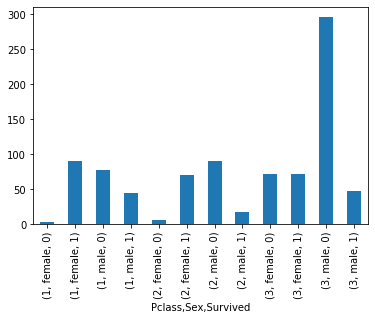

In [319]:
# figured this out from https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart 

df2.groupby(['Pclass','Sex','Survived'])['Survived'].count().plot(kind='bar')


Now I have figured out how to show the data I want: how many males, females, in each passenger class (1, 2 or 3), survived or not (1 or 0). But they are all separated into their own columns. I want to make them stack. How?

I'm looking at that tall column (3, male, 0), which mean males in 3rd class who did not survive.

Next I'm going to make a simple chart showing ONLY survivors. Notice how I get only the rowst have 1 in the Survived column — and I store that as a new dataframe named `sur`.

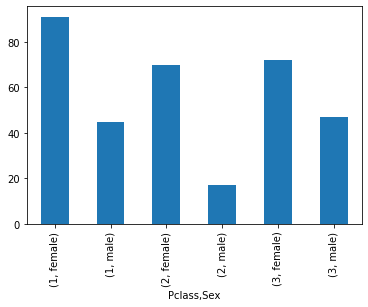

In [320]:
# using df2, make a new dataframe that includes only survivors
sur = df2[df2.Survived == 1]

# using that new dataframe, make a new bar chart
sur.groupby(['Pclass','Sex'])['Survived'].count().plot.bar()

Note how the next chart shows the opposite of the chart above. Above: Survivors only. Below: Dead only. Note the difference in the vertical Y axis.

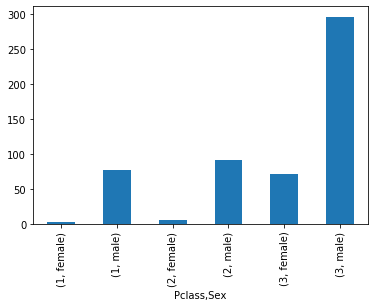

In [321]:
# using df2, make a new dataframe that includes only the dead
died = df2[df2.Survived == 0]

# using that new dataframe, make a new bar chart
died.groupby(['Pclass','Sex'])['Survived'].count().plot.bar()

Great — but still not a stacked bar chart like I wanted.

In [322]:
# back to something I had earlier - but without the chart
df2.groupby(['Pclass','Sex','Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           296
                1            47
Name: Survived, dtype: int64

In [323]:
# what if I save that as all_grps
all_grps = df2.groupby(['Pclass','Sex','Survived'])['Survived'].count()

# can I use the counts from that dataframe? Yes!
# this gives me the count for 3rd class, male, 0 (did not survive)
all_grps[3][2]

296

In [324]:
# this gives me the count for 1st class, female, 1 (survived)
all_grps[1][1]

91

That was interesting, but it did not seem very helpful. On to a new attempt.

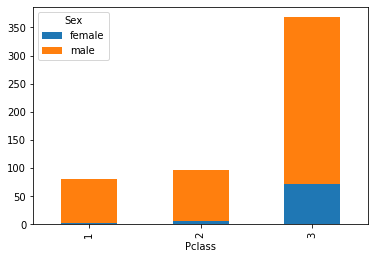

In [325]:
# only people who died, using new dataframe "died" from earlier
died.groupby(['Pclass','Sex'])['Survived'].count().unstack().plot.bar(stacked=True)

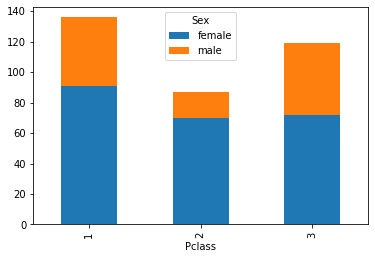

In [326]:
# only people who survived, using new dataframe "sur" from earlier
sur.groupby(['Pclass','Sex'])['Survived'].count().unstack().plot.bar(stacked=True)

I would *really* like to get the survivors and the dead into one chart. But I have not quite figured that out.

## Your chart choice (2 points)

Explain:

- Why this chart?
- What information does it convey? How?


YOUR ANSWERS HERE

## Part 2: Bokeh visualizations (4 points)

You have two possible datasets to use for this (both are in the `data` folder):

- HVAC.csv: A dataset with air-conditioning temperature measurements
- WHO.csv: The WHO data we have worked with last week (and in Module 2)

Use *one* of these datasets to build an interactive chart with Bokeh. Make sure you investigate your data first and choose a chart you think conveys the data *well.* Please make sure to fill out the **"Your chart choice"** section below.

Some ideas on possible charts (you are free to use these, or come up with your own!):

#### HVAC dataset

- HVAC: Chart a few buildings with actual temperature over time.
- HVAC: Chart a few systems with actual and target temperatures over time.
- HVAC: Identify a few systems or buildings that don't compare to the others. Chart their data vs. the average or median values.

#### WHO dataset

- WHO: Chart primary-school enrollment male vs. female for a region or selection of countries.
- WHO: Compare child mortality across regions or countries.
- WHO: Show correlations between two fields you find interesting.

HINT: Explore each dataset a bit before deciding on a visualization. [Look at some Bokeh examples.](https://bokeh.pydata.org/en/latest/docs/gallery.html#gallery) 


In [327]:
# YOUR CODE HERE 
who_df = pd.read_csv('data/WHO.csv')

# examine dataset
who_df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [328]:
# examine dataset
who_df.shape

(194, 13)

In [329]:
# examine dataset
# how many countries in each region?
who_df.Region.value_counts()

Europe                   53
Africa                   46
Americas                 35
Western Pacific          27
Eastern Mediterranean    22
South-East Asia          11
Name: Region, dtype: int64

In [330]:
# get column names for easy copy/pasting
who_df.columns

Index(['Country', 'Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'LifeExpectancy', 'ChildMortality', 'CellularSubscribers',
       'LiteracyRate', 'GNI', 'PrimarySchoolEnrollmentMale',
       'PrimarySchoolEnrollmentFemale'],
      dtype='object')

I think I would like to make a scatter plot of child mortality against life expectancy.

In [331]:
# examine ChildMortality
who_df.ChildMortality.describe()

count    194.000000
mean      36.148969
std       37.992935
min        2.200000
25%        8.425000
50%       18.600000
75%       55.975000
max      181.600000
Name: ChildMortality, dtype: float64

In [332]:
# examine LifeExpectancy
who_df.LifeExpectancy.describe()

count    194.000000
mean      70.010309
std        9.259075
min       47.000000
25%       64.000000
50%       72.500000
75%       76.000000
max       83.000000
Name: LifeExpectancy, dtype: float64

Seems like there are numeric values for all countries, since min and max are numbers for both columns I just examined. 

Let's load up the Bokeh things.

In [333]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [334]:
# make a chart where x-axis is ChildMortality and y-axis is LifeExpectancy 

# for tools, see https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html 
TOOLS = "zoom_in,zoom_out,hover,pan,crosshair,reset"

# define data source as the data frame
source = ColumnDataSource(who_df)

# for tooltips, see same page - the @ things are column names from the defined source 
TOOLTIPS = [
    ("country", "@Country"),
    ("mortality", "@ChildMortality"),
    ("life exp", "@LifeExpectancy")
]

# for figure, see https://bokeh.pydata.org/en/latest/docs/reference/plotting.html 
p = figure(tools=TOOLS,
           tooltips=TOOLTIPS,
           x_axis_label="Child Mortality per 1,000 Live Births",
           y_axis_label="Life Expectancy in Years",
           title="WHO Data: Child Mortality and Life Expectancy",
           plot_width=900)

# for scatter, see https://bokeh.pydata.org/en/latest/docs/gallery/color_scatter.html 
p.scatter('ChildMortality', 'LifeExpectancy', 
          source=source,
          line_color="#6666ee",
          fill_color="#ee6666", 
          fill_alpha=0.6,
          size=16)

# show the chart defined above as "p" 
show(p)


I would like to color the dots by region, but that will wait for another day. 

## Your chart choice (1 point)

Explain:

- Why this chart?
- What information does it convey? How?


YOUR ANSWERS HERE

## Your Debugging Notes

Add your debugging notes here! Possible topics include:
- What parts of the assignment did you have problems with? How did you solve those problems?
- Where were you able to find help? (links, resources, documentation)
- What did you try first? How did you find the answer?
- What do you know now that would have helped in problem solving?
- Did you notice a change in thinking or confidence that helped you solve the problem? 

Remember: Please keep as much debugging code as possible in the solutions for extra credit! (Feel free to use the + button to add cells for this purpose!)

YOUR NOTES HERE